# Indexation d'images par la texture

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread

## 1. Observations et expérimentations dans l'espace de Fourier

Calculer le spectre en amplitude d'une image.

Observer l'organisation des intensités maximales.

Quelle relation observez-vous entre l'organisation des fréquences d'amplitude maximale et l'orientation du texte ?

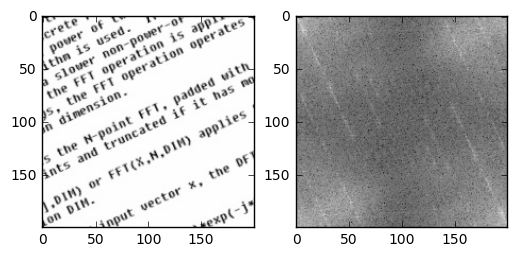

In [3]:
img = imread('tp2.jpg')

transform = np.log(np.abs(np.fft.fft2(img)))

plt.subplot(121)
plt.imshow(img, cmap='Greys_r')
plt.subplot(122)
plt.imshow(transform, cmap='Greys_r')

## 2. Construction d'un descripteur pour différentes classes de texture

Ecrire une fonction descripteur qui applique le processus suivant...
Nous travaillerons sur ces images converties en niveaux de gris (en calculant la moyenne de l'intensité en RGB).
Sur chaque image en niveaux de gris, nous calculons la Transformée de Fourier 2D et nous produisons l'image du spectre en amplitude.
Nous découpons la moitié supérieure en 6x3 blocs, puis nous calculons le logarithme de l'énergie moyenne sur chacun d'eux (i.e. la moyenne des coefficients au carré).
Nous mémorisons enfin les 18 résultats pour chaque image.

In [9]:
def descriptor(image):
    grays = np.zeros(image.shape)
    # Moyennage de chaque pixel
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            grays[i][j] = np.mean(pixel)
    # Extraction de la valeur réelle (avec la fonction abs) de la FFT-2D
    transform = np.abs(np.fft.fft2(grays))
    # Découpage en blocs
    top = transform[:transform.shape[0] // 2, :] # Moitié supérieure
    x_step = top.shape[0] // 3 # 100 // 3 = 33
    y_step = top.shape[1] // 6 # 200 // 6 = 33
    return {
        '{}-{}'.format(i, j): np.log(np.mean(np.square(top[x:x+x_step, y:y+y_step])))
        for j, y in enumerate(range(0, top.shape[1] - y_step, y_step))
        for i, x in enumerate(range(0, top.shape[0] - x_step, x_step))
    }

descriptor(imread('img/50.jpg'))

{'0-0': 18.103565547179794,
 '0-1': 13.082310545668296,
 '0-2': 12.314375422676683,
 '0-3': 12.214765071501846,
 '0-4': 13.069642016286133,
 '0-5': 14.521817296039099,
 '1-0': 17.513515543670902,
 '1-1': 12.526732132767673,
 '1-2': 11.901133823110426,
 '1-3': 11.882265796232593,
 '1-4': 12.472619996713529,
 '1-5': 14.078107593230012,
 '2-0': 17.569240674330405,
 '2-1': 12.846672770873722,
 '2-2': 11.854946111911735,
 '2-3': 11.808473953936733,
 '2-4': 12.813062232255266,
 '2-5': 14.733393613553281}

Application du descripteur à chaque image.

In [22]:
from os import listdir

descriptors = {
    i: descriptor(imread('img/{}'.format(image_file)))
    for i, image_file in enumerate(listdir('img/'))
}

descriptors

{0: {'0-0': 17.712197298089755,
  '0-1': 12.610324130848531,
  '0-2': 11.803029323140768,
  '0-3': 11.735332068357586,
  '0-4': 12.549504521036061,
  '0-5': 14.199023642946347,
  '1-0': 17.773954057532638,
  '1-1': 12.811334181597545,
  '1-2': 11.843783067620391,
  '1-3': 11.819740192519372,
  '1-4': 12.680657635129927,
  '1-5': 14.294848306339643,
  '2-0': 18.006589515260522,
  '2-1': 12.788060021868221,
  '2-2': 11.982651428693462,
  '2-3': 11.965429431484029,
  '2-4': 12.673093356177709,
  '2-5': 14.459662256541383},
 1: {'0-0': 17.086373491029626,
  '0-1': 12.178491523486894,
  '0-2': 11.017873183191957,
  '0-3': 10.980004821852313,
  '0-4': 12.011476089992103,
  '0-5': 14.371216271871711,
  '1-0': 17.424252958745466,
  '1-1': 12.333373066019149,
  '1-2': 11.158195979436556,
  '1-3': 11.096957517501611,
  '1-4': 12.215293653512386,
  '1-5': 14.804449576522559,
  '2-0': 17.530794044517432,
  '2-1': 12.264777610233459,
  '2-2': 10.933312381425278,
  '2-3': 10.870139204951938,
  '2-4'

## 3. Calcul d'une distance et requête par l'exemple

Ensuite, en appliquant une distance de Manhattan sur les 18 coefficients associés à chaque image, renvoyer les 10 images les plus proches (au sens de cette distance) d'une image requête identifiée par l'utilisateur.

In [24]:
def manhattan(X, Y):
    return sum((abs(x - y) for x, y in zip(X, Y)))


target_img = 1

neighbours = sorted(descriptors.items(), key=lambda x: manhattan(x[1].values(), descriptors[target_img].values()))

for neighbour in neighbours[:11]:
    print(neighbour[0])

1
23
42
48
3
39
8
47
9
12
10
